In [15]:
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import matplotlib 

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

## I assume that my first function is as follows:
## $f(x)=FloorFunction[\frac{x}{16}]$
### and $(16)_{10}=(10000)_{2}$
### According to the decimal form of the number 16 It is the first qubit that determines whether x is greater or less than 16 </br> (If the first qubit of a byte series is 1, that number must be greater than or equal to 16, and conversely, if the first qubit of a byte series is 0, that number must be less than 16 (In 5bits))

### $U_{f}|x\rangle|y\rangle=|x\rangle|y \oplus f(x)\rangle$
### $y$ is the last qubit
### $if\; x<16: U_{f}|x\rangle|y\rangle=|x\rangle|y\rangle$
### $if\; x \geq 16: U_{f}|x\rangle|y\rangle=|x\rangle X |y\rangle$
### so our circuit will be:


In [16]:
circuit1 = cirq.Circuit()
qq = cirq.LineQubit.range(6)
circuit1.append(cirq.H.on_each((qq[0:5])))
circuit1.append(cirq.X.on_each(qq[5]))
circuit1.append(cirq.H.on_each(qq[5]))
# oracle

circuit1.append(cirq.X(qq[5]).controlled_by(qq[0]))
circuit1.append(cirq.I.on_each(qq[1:5]))

# -----
circuit1.append(cirq.H.on_each((qq[0:5])))
circuit1.append(cirq.measure((qq[0:5]), key='result'))

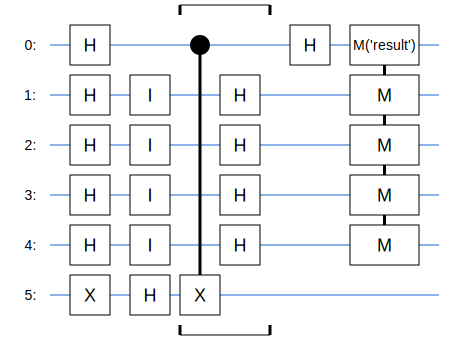

In [17]:
SVGCircuit(circuit1)

/opt/anaconda3/lib/python3.9/site-packages/cirq/vis/state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


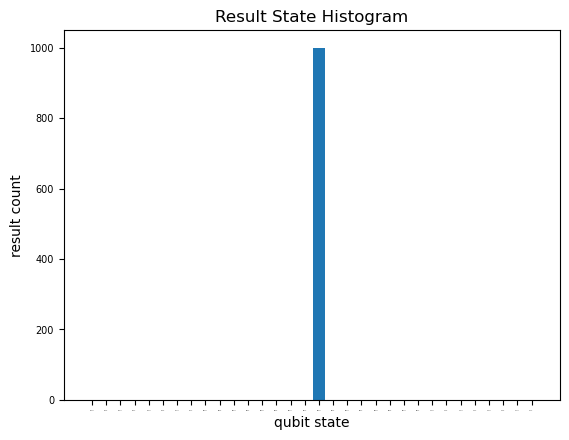

In [18]:
s=cirq.Simulator()
sample=s.run(circuit1,repetitions=1000)

cirq.plot_state_histogram(sample,tick_label=binary_labels(5))
matplotlib.rc('xtick', labelsize=.2) 
matplotlib.rc('ytick', labelsize=7)
plt.savefig("first_fuction.pdf") 

## I assume that my second function is as follows:
## $f(x)=FloorFunction[\frac{x}{31}]$ for x<31 and for x=31 $f(x)=0$
### and $(31)_{10}=(11111)_{2}$
### $U_{f}|x\rangle|y\rangle=|x\rangle|y \oplus f(x)\rangle$
### $y$ is the last qubit
### $if\; x \leq 31: U_{f}|x\rangle|y\rangle=|x\rangle|y\rangle$
### $if\; x > 31: U_{f}|x\rangle|y\rangle=|x\rangle X |y\rangle$
### According to the decimal form of the number 31 All of qubits that determine whether x is greater or less than 31 </br> (If all of qubits of a byte series are 1, that number must be equal to 31, so we must use CNOT controlled by all of qubits (Except of 6th)) 
### pay attention I use 2 CNOTs because $f(31)=0$
### so our circuit will be:

In [19]:
circuit2 = cirq.Circuit()
qq = cirq.LineQubit.range(6)
circuit2.append(cirq.H.on_each((qq[0:5])))
circuit2.append(cirq.X.on_each(qq[5]))
circuit2.append(cirq.H.on_each(qq[5]))
# oracle
# circuit2.append(cirq.X(qq[4]).controlled_by(qq[3]))
circuit2.append(cirq.X(qq[5]).controlled_by(*(qq[0:5])))
circuit2.append(cirq.X(qq[5]).controlled_by(*(qq[0:5])))
# -----
circuit2.append(cirq.H.on_each((qq[0:5])))
circuit2.append(cirq.measure((qq[0:5]), key='result'))

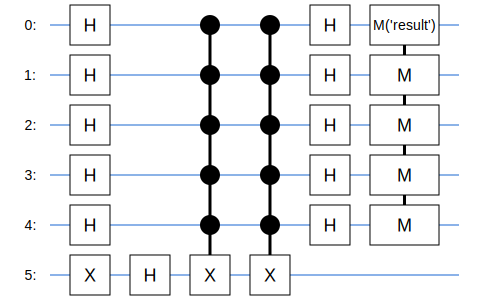

In [20]:
SVGCircuit(circuit2)

/opt/anaconda3/lib/python3.9/site-packages/cirq/vis/state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


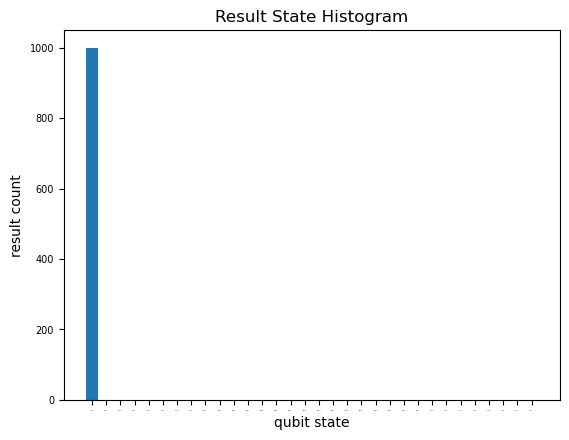

In [21]:


s=cirq.Simulator()
sample=s.run(circuit2,repetitions=1000)

cirq.plot_state_histogram(sample,tick_label=binary_labels(5))
# plt.xlim(right=6)
matplotlib.rc('xtick', labelsize=.3) 
matplotlib.rc('ytick', labelsize=7)
plt.savefig("second_function.pdf") 

##### it's better see the results in "second_fuction.pdf"

# Now I wanna show states of system in each step

### for frist function

#### step1

In [22]:
circuit1 = cirq.Circuit()
qq = cirq.LineQubit.range(6)
circuit1.append(cirq.H.on_each((qq[0:5])))
circuit1.append(cirq.X.on_each(qq[5]))
circuit1.append(cirq.H.on_each(qq[5]))
print(circuit1)
result=s.simulate(circuit1,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()


0: ───H───────

1: ───H───────

2: ───H───────

3: ───H───────

4: ───H───────

5: ───X───H───


'0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ + 0.12|100000⟩ - 0.12|100001⟩ + 0.12|100010⟩ - 0.12|100011⟩ + 0.12|100100⟩ - 0.12|100101⟩ + 0.12|100110⟩ - 0.12|100111⟩ + 0.12|101000⟩ - 0.12|101001⟩ + 0.12|101010⟩ - 0.12|101011⟩ + 0.12|101100⟩ - 0.12|101101⟩ + 0.12|101110⟩ - 0.12|101111⟩ + 0.12|110000⟩ - 0.12|110001⟩ + 0.12|110010⟩ - 0.12|110011⟩ + 0.12|110100⟩ - 0.12|110101⟩ + 0.12|110110⟩ - 0.12|110111⟩ + 0.12|111000⟩ - 0.12|111001⟩ + 0.12|111010⟩ - 0.12|111011⟩ + 0.12|111100⟩ - 0.12|111101⟩ + 0.12|111110⟩ - 0.12|111111⟩'

##### step2

In [23]:
circuit1.append(cirq.X(qq[5]).controlled_by(qq[0]))
circuit1.append(cirq.I.on_each(qq[1:5]))
print(circuit1)
result=s.simulate(circuit1,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

0: ───H───────@───
              │
1: ───H───I───┼───
              │
2: ───H───I───┼───
              │
3: ───H───I───┼───
              │
4: ───H───I───┼───
              │
5: ───X───H───X───


'0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ - 0.12|100000⟩ + 0.12|100001⟩ - 0.12|100010⟩ + 0.12|100011⟩ - 0.12|100100⟩ + 0.12|100101⟩ - 0.12|100110⟩ + 0.12|100111⟩ - 0.12|101000⟩ + 0.12|101001⟩ - 0.12|101010⟩ + 0.12|101011⟩ - 0.12|101100⟩ + 0.12|101101⟩ - 0.12|101110⟩ + 0.12|101111⟩ - 0.12|110000⟩ + 0.12|110001⟩ - 0.12|110010⟩ + 0.12|110011⟩ - 0.12|110100⟩ + 0.12|110101⟩ - 0.12|110110⟩ + 0.12|110111⟩ - 0.12|111000⟩ + 0.12|111001⟩ - 0.12|111010⟩ + 0.12|111011⟩ - 0.12|111100⟩ + 0.12|111101⟩ - 0.12|111110⟩ + 0.12|111111⟩'

#### step3

In [24]:
circuit1.append(cirq.H.on_each((qq[0:5])))
print(circuit1)
result=s.simulate(circuit1,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

              ┌──┐
0: ───H────────@─────H───
               │
1: ───H───I────┼H────────
               │
2: ───H───I────┼H────────
               │
3: ───H───I────┼H────────
               │
4: ───H───I────┼H────────
               │
5: ───X───H────X─────────
              └──┘


'0.71|100000⟩ - 0.71|100001⟩'

# For second function 

#### step1

In [25]:
circuit2 = cirq.Circuit()
qq = cirq.LineQubit.range(6)
circuit2.append(cirq.H.on_each((qq[0:5])))
circuit2.append(cirq.X.on_each(qq[5]))
circuit2.append(cirq.H.on_each(qq[5]))
print(circuit2)
result=s.simulate(circuit2,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

0: ───H───────

1: ───H───────

2: ───H───────

3: ───H───────

4: ───H───────

5: ───X───H───


'0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ + 0.12|100000⟩ - 0.12|100001⟩ + 0.12|100010⟩ - 0.12|100011⟩ + 0.12|100100⟩ - 0.12|100101⟩ + 0.12|100110⟩ - 0.12|100111⟩ + 0.12|101000⟩ - 0.12|101001⟩ + 0.12|101010⟩ - 0.12|101011⟩ + 0.12|101100⟩ - 0.12|101101⟩ + 0.12|101110⟩ - 0.12|101111⟩ + 0.12|110000⟩ - 0.12|110001⟩ + 0.12|110010⟩ - 0.12|110011⟩ + 0.12|110100⟩ - 0.12|110101⟩ + 0.12|110110⟩ - 0.12|110111⟩ + 0.12|111000⟩ - 0.12|111001⟩ + 0.12|111010⟩ - 0.12|111011⟩ + 0.12|111100⟩ - 0.12|111101⟩ + 0.12|111110⟩ - 0.12|111111⟩'

#### step 2

In [26]:
# oracle
circuit2.append(cirq.X(qq[5]).controlled_by(*(qq[0:5])))
# -----
print(circuit2)
result=s.simulate(circuit2,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

0: ───H───────@───
              │
1: ───H───────@───
              │
2: ───H───────@───
              │
3: ───H───────@───
              │
4: ───H───────@───
              │
5: ───X───H───X───


'0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ + 0.12|100000⟩ - 0.12|100001⟩ + 0.12|100010⟩ - 0.12|100011⟩ + 0.12|100100⟩ - 0.12|100101⟩ + 0.12|100110⟩ - 0.12|100111⟩ + 0.12|101000⟩ - 0.12|101001⟩ + 0.12|101010⟩ - 0.12|101011⟩ + 0.12|101100⟩ - 0.12|101101⟩ + 0.12|101110⟩ - 0.12|101111⟩ + 0.12|110000⟩ - 0.12|110001⟩ + 0.12|110010⟩ - 0.12|110011⟩ + 0.12|110100⟩ - 0.12|110101⟩ + 0.12|110110⟩ - 0.12|110111⟩ + 0.12|111000⟩ - 0.12|111001⟩ + 0.12|111010⟩ - 0.12|111011⟩ + 0.12|111100⟩ - 0.12|111101⟩ - 0.12|111110⟩ + 0.12|111111⟩'

#### step 3

In [27]:

circuit2.append(cirq.X(qq[5]).controlled_by(*(qq[0:5])))
# -----
print(circuit2)
result=s.simulate(circuit2,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

0: ───H───────@───@───
              │   │
1: ───H───────@───@───
              │   │
2: ───H───────@───@───
              │   │
3: ───H───────@───@───
              │   │
4: ───H───────@───@───
              │   │
5: ───X───H───X───X───


'0.12|000000⟩ - 0.12|000001⟩ + 0.12|000010⟩ - 0.12|000011⟩ + 0.12|000100⟩ - 0.12|000101⟩ + 0.12|000110⟩ - 0.12|000111⟩ + 0.12|001000⟩ - 0.12|001001⟩ + 0.12|001010⟩ - 0.12|001011⟩ + 0.12|001100⟩ - 0.12|001101⟩ + 0.12|001110⟩ - 0.12|001111⟩ + 0.12|010000⟩ - 0.12|010001⟩ + 0.12|010010⟩ - 0.12|010011⟩ + 0.12|010100⟩ - 0.12|010101⟩ + 0.12|010110⟩ - 0.12|010111⟩ + 0.12|011000⟩ - 0.12|011001⟩ + 0.12|011010⟩ - 0.12|011011⟩ + 0.12|011100⟩ - 0.12|011101⟩ + 0.12|011110⟩ - 0.12|011111⟩ + 0.12|100000⟩ - 0.12|100001⟩ + 0.12|100010⟩ - 0.12|100011⟩ + 0.12|100100⟩ - 0.12|100101⟩ + 0.12|100110⟩ - 0.12|100111⟩ + 0.12|101000⟩ - 0.12|101001⟩ + 0.12|101010⟩ - 0.12|101011⟩ + 0.12|101100⟩ - 0.12|101101⟩ + 0.12|101110⟩ - 0.12|101111⟩ + 0.12|110000⟩ - 0.12|110001⟩ + 0.12|110010⟩ - 0.12|110011⟩ + 0.12|110100⟩ - 0.12|110101⟩ + 0.12|110110⟩ - 0.12|110111⟩ + 0.12|111000⟩ - 0.12|111001⟩ + 0.12|111010⟩ - 0.12|111011⟩ + 0.12|111100⟩ - 0.12|111101⟩ + 0.12|111110⟩ - 0.12|111111⟩'

In [28]:
circuit2.append(cirq.H.on_each((qq[0:5])))
print(circuit2)
result=s.simulate(circuit2,qubit_order=[qq[i] for i in range(6)])
result.dirac_notation()

0: ───H───────@───@───H───
              │   │
1: ───H───────@───@───H───
              │   │
2: ───H───────@───@───H───
              │   │
3: ───H───────@───@───H───
              │   │
4: ───H───────@───@───H───
              │   │
5: ───X───H───X───X───────


'0.71|000000⟩ - 0.71|000001⟩'

# Conclusion

## The advantage of the Deutsch-Jozsa algorithm is that I don't need to put all the values in the desired function to determine whether the function is the balanced or constant (sometimes less, depending on what assumptions I have for the function (for exp $2^{n-1}+1$)).
